In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
img = cv2.imread('../au_dataset/C2_0_2509.jpg', cv2.IMREAD_GRAYSCALE)

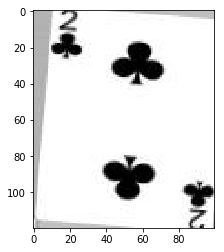

In [7]:
plt.imshow(img, cmap = 'gray')
plt.show()

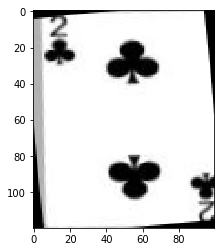

In [11]:
height, width = img.shape
matrix = cv2.getRotationMatrix2D(((width)/2, (height)/2), 6, 1)
dst = cv2.warpAffine(img, matrix, (width, height))
plt.imshow(dst,cmap = 'gray')

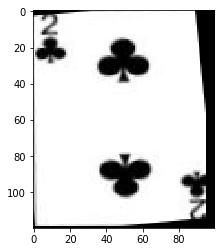

In [17]:
M = np.float32([[1, 0, -5], [0, 1, -1]]) # 이미지를 왼쪽으로 5, 밑으로 1 이동시킵니다.
img_translation = cv2.warpAffine(dst, M, (width,height))
plt.imshow(img_translation,cmap = 'gray')
plt.show()

In [19]:
C2 = cv2.imread('../dataset/card_deck1/C2.jpg', cv2.IMREAD_GRAYSCALE)
cv2.absdiff(img_translation,C2).sum()

330979

TypeError: Image data cannot be converted to float

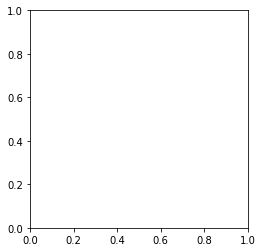

In [24]:
plt.imshow(cv2.threshold(img, 25, 255, cv2.THRESH_BINARY), cmap='gray')

In [23]:
cv2.threshold(img, 25, 255, cv2.THRESH_BINARY)

(25.0, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [26]:
edges = cv2.Canny(img,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,150)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)

TypeError: 'NoneType' object is not iterable

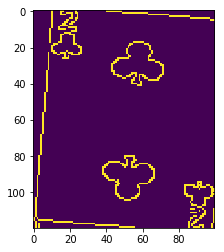

In [28]:
plt.imshow(cv2.Canny(img,50,150,apertureSize = 3))

In [30]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)
lines

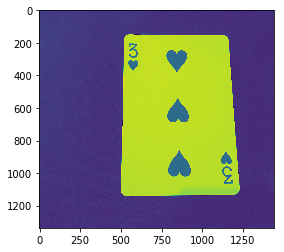

In [45]:
CK = cv2.imread('heart3.jpg')
gray = cv2.cvtColor(CK,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 50
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
 
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(gray,(x1,y1),(x2,y2),(0,255,0),1)
plt.imshow(gray)
# lines

In [48]:
import cv2
import numpy as np
 
img = cv2.imread('heart3.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
# lines = cv2.HoughLines(edges,1,np.pi/180,150)
for line in lines:
    print(line)
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)
plt.imshow(img)

[[515 483 515 444]]


ValueError: too many values to unpack (expected 2)

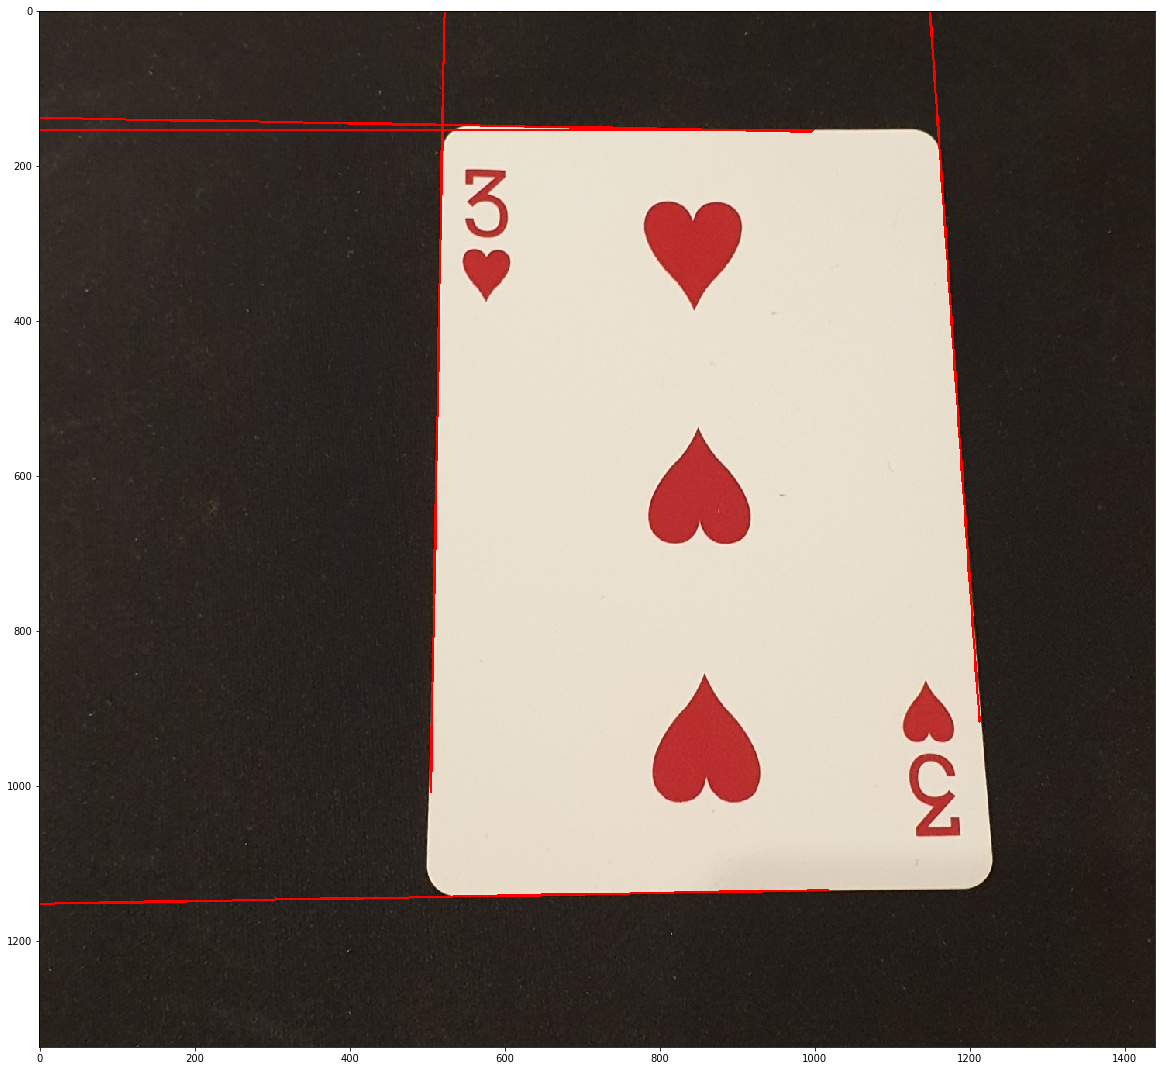

In [67]:
import cv2
import numpy as np

img = cv2.imread('heart3.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)
# cv2.imwrite('houghlines3.jpg',img)

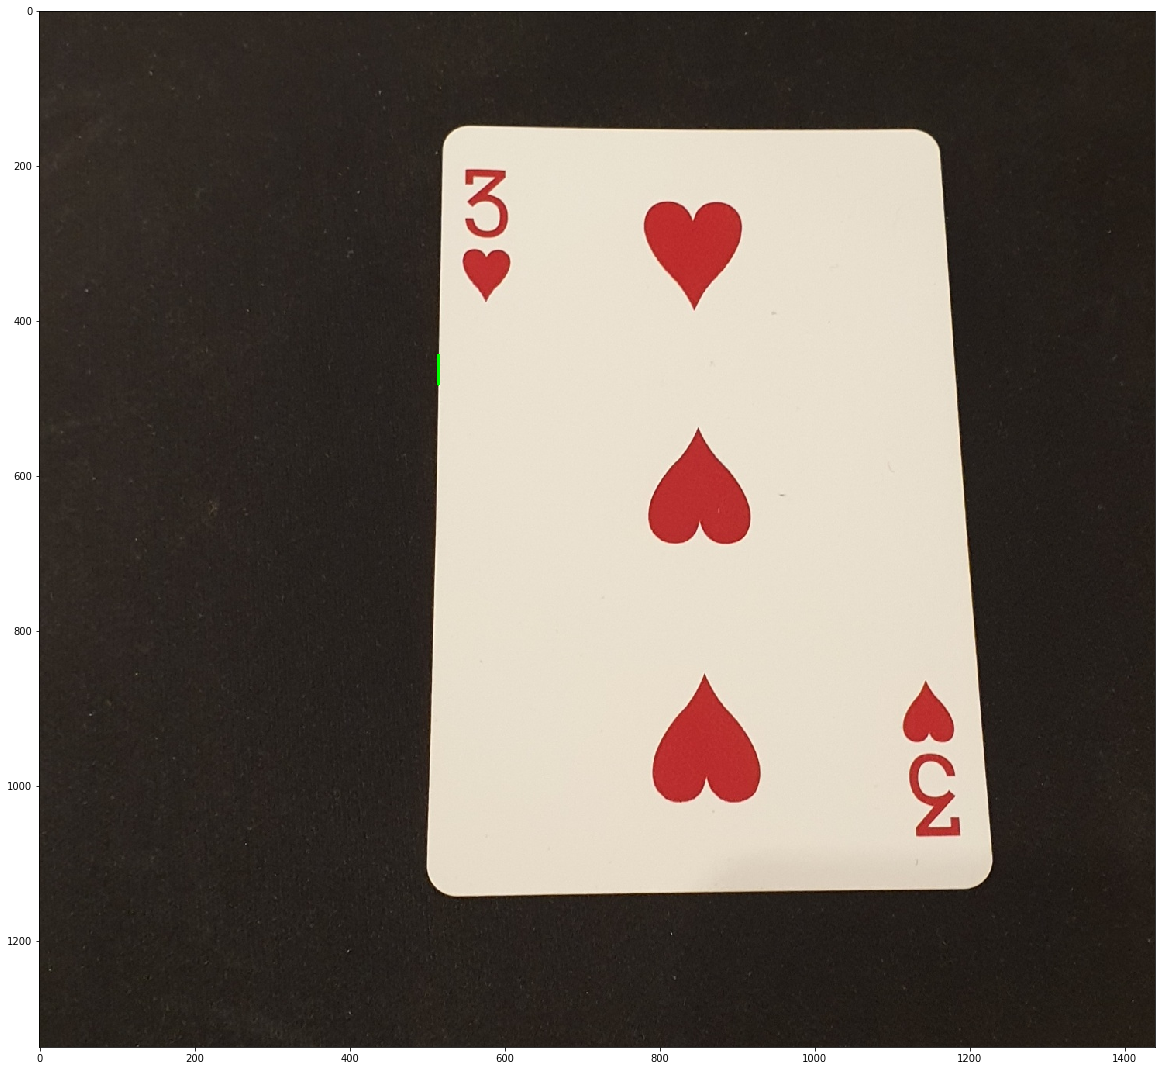

In [56]:
import cv2
import numpy as np

img = cv2.imread('heart3.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)

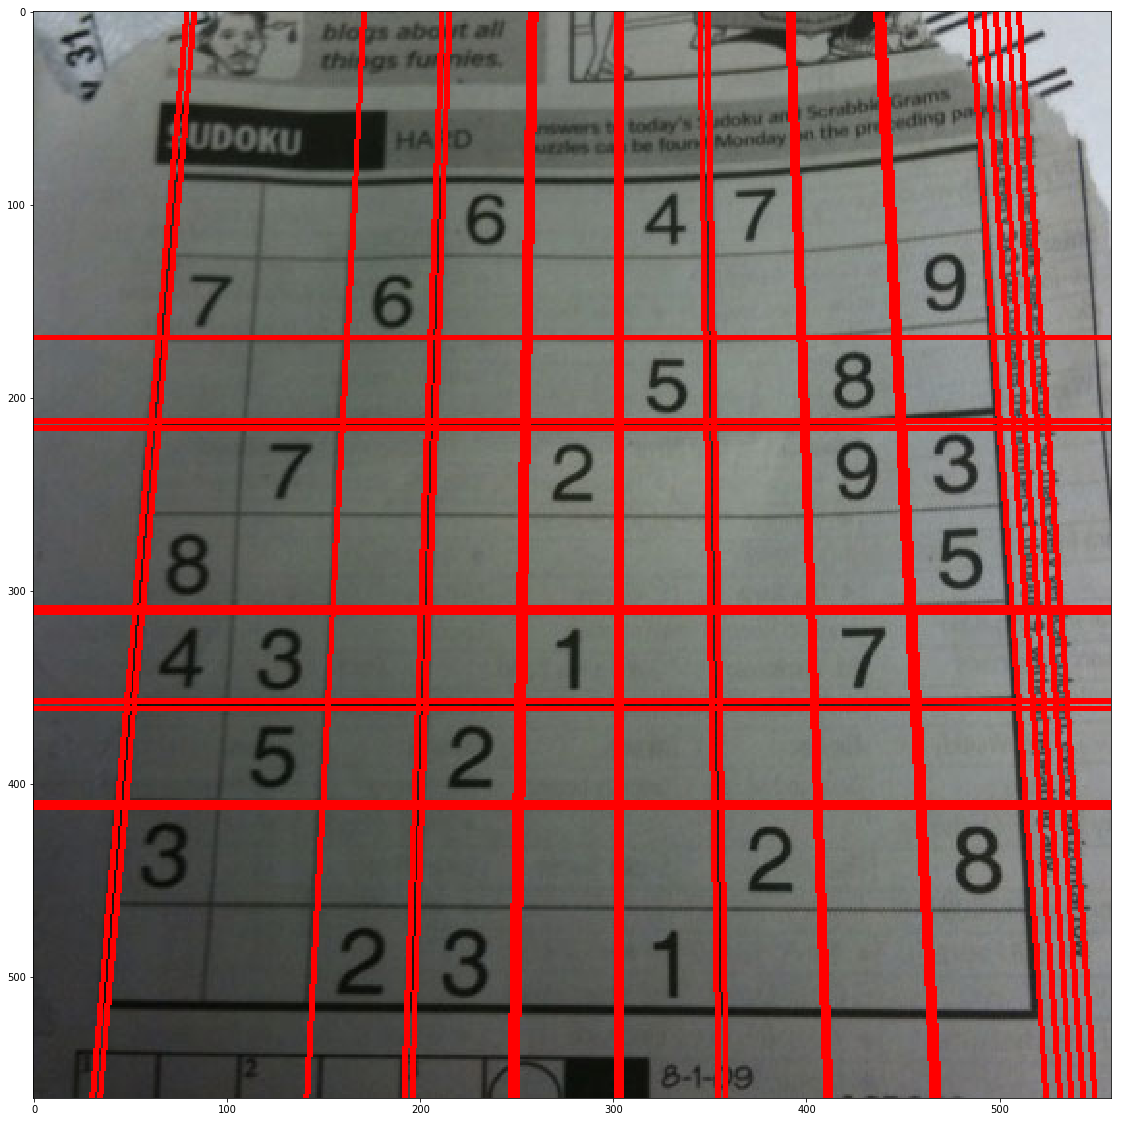

In [66]:
import cv2
import numpy as np

img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)
# cv2.imwrite('houghlines3.jpg',img)

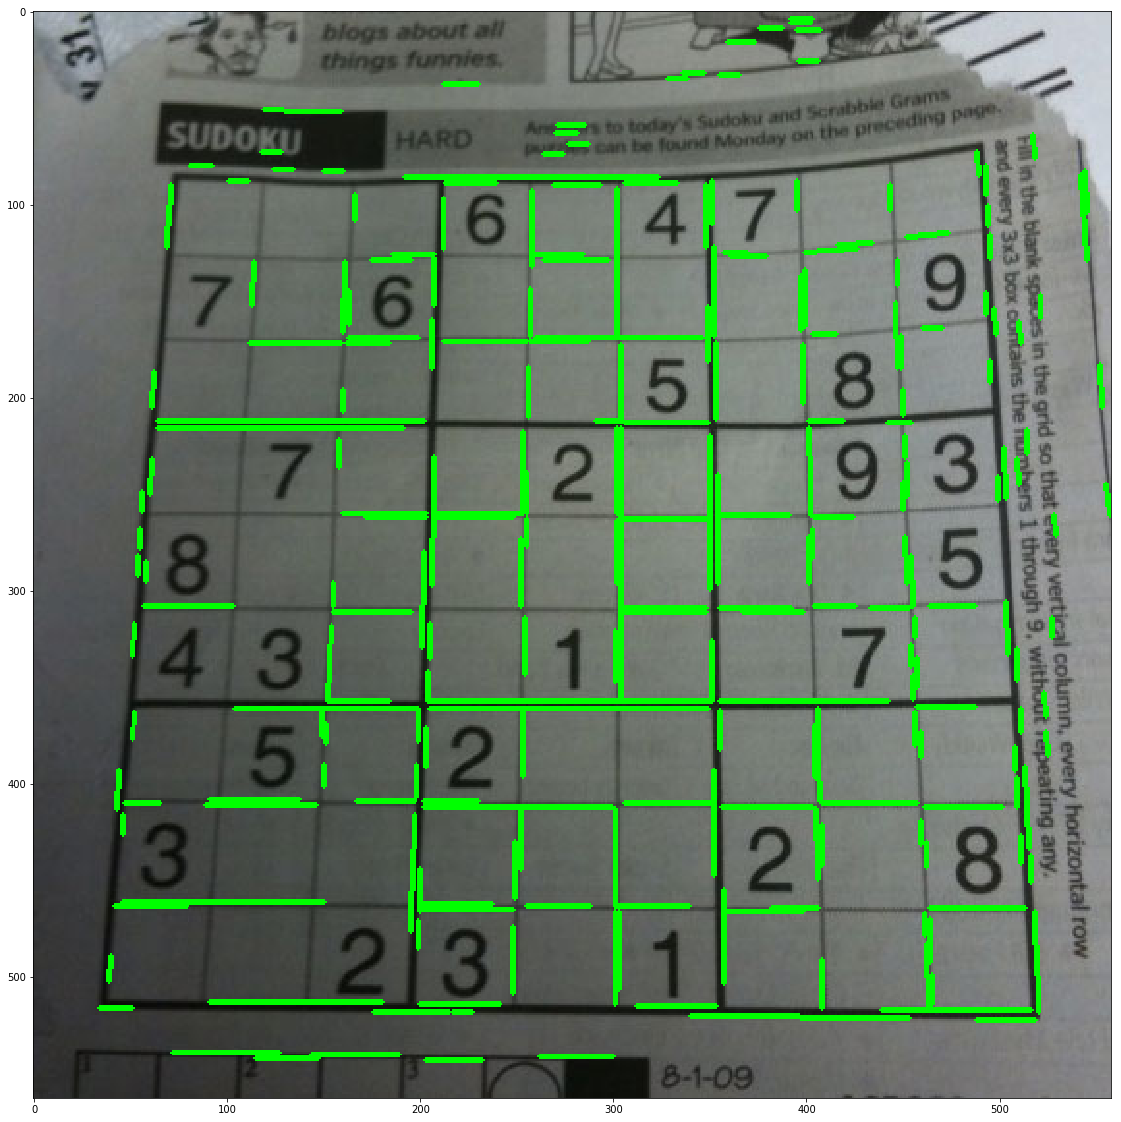

In [65]:
import cv2
import numpy as np

img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)

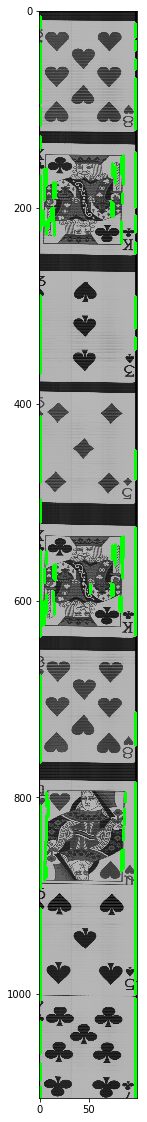

In [68]:
import cv2
import numpy as np

img = cv2.imread('cards_new.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)

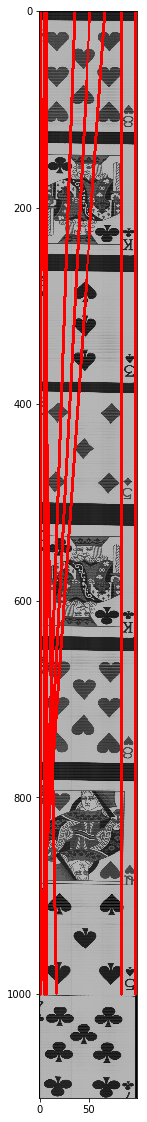

In [69]:
import cv2
import numpy as np

img = cv2.imread('cards_new.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)
# cv2.imwrite('houghlines3.jpg',img)

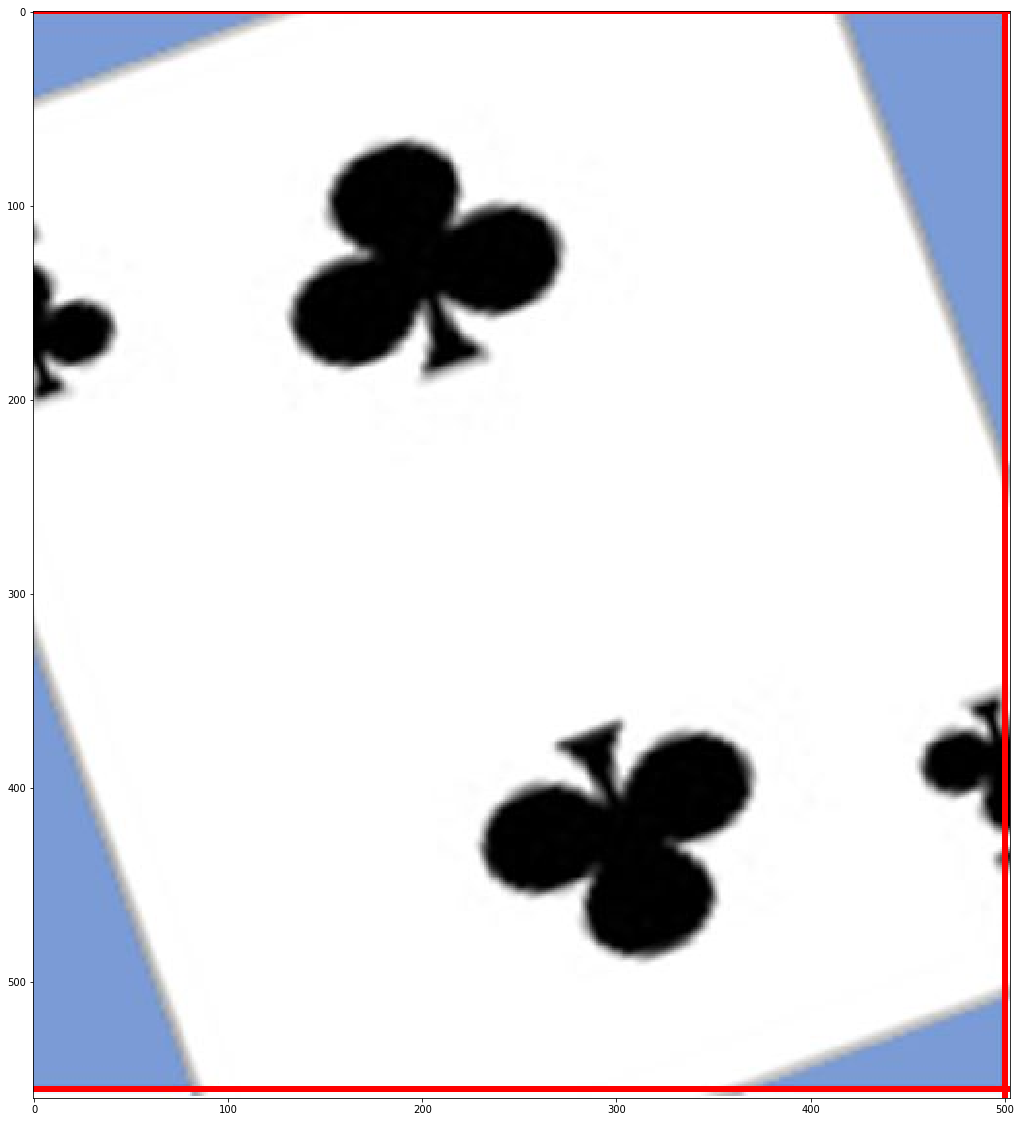

In [98]:
import cv2
import numpy as np

img = cv2.imread('C2_2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, gray = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(20,20))
plt.imshow(img)
# cv2.imwrite('houghlines3.jpg',img)

In [ ]:
plt.imshow(tmp)

In [86]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

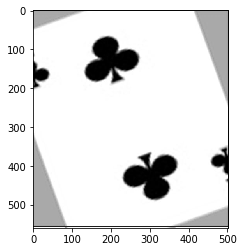

In [87]:
plt.imshow(gray, cmap='gray')

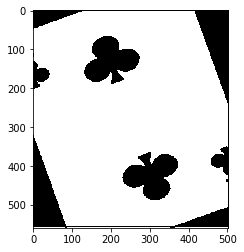

In [93]:
_, tmp = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(tmp,cmap='gray')

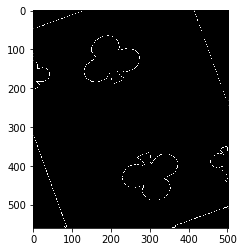

In [101]:
plt.imshow(edges,cmap='gray')

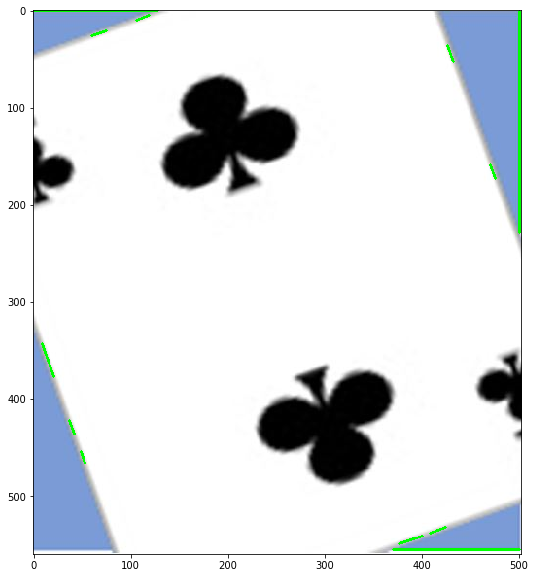

In [105]:
import cv2
import numpy as np

img = cv2.imread('C2_2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, gray = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(gray,50,150,apertureSize = 7)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [131]:
def edge_detect(file_name, tresh_min, tresh_max):
    f = plt.figure(figsize=(20,20))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    col = 0
    cv2.drawContours(image, contours, -1, (255,0,0), 2)
    ax2.imshow(im_bw)
    ax3.imshow(image)
    cv2.imwrite('cnt_'+file_name, image)
    print(len(contours))
    return contours

3


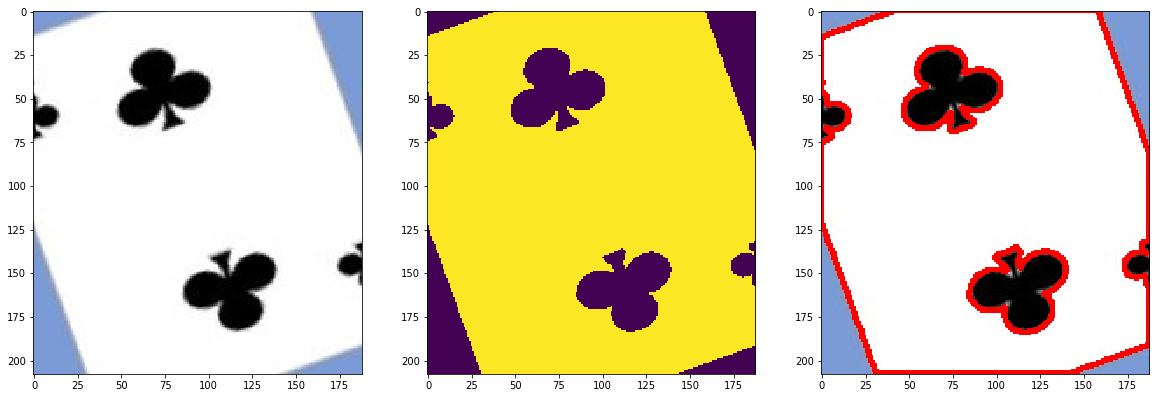

In [136]:
con = edge_detect('C2.jpg', 200, 255)

3


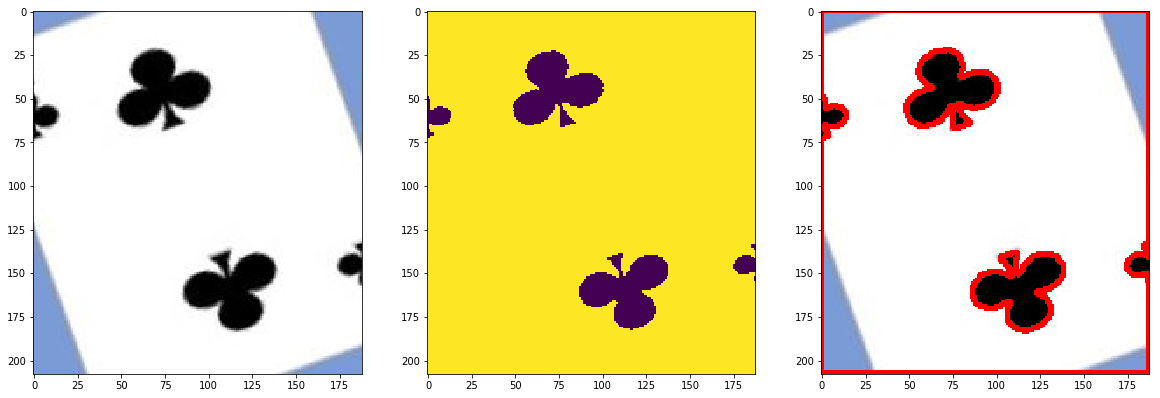

In [137]:
con = edge_detect('C2.jpg', 50, 255)